# 1. Score current methods

In [1]:
import ast
import pandas as pd
from collections import defaultdict

from common import score_models, display_histogram

In [2]:
reading_lists = pd.read_csv("../reading_lists.csv")
reading_lists['reading_list'] = reading_lists['reading_list'].apply(ast.literal_eval)

trues = { id_:[ref["paperId"] for ref in references] for id_, references in zip(reading_lists["id"], reading_lists["reading_list"]) }

In [3]:
models_paths = {
    "Semantic Scholar": "current_methods/search_engines/preds/semantic_scholar",
    "Google Scholar": "current_methods/search_engines/preds/google_scholar",
    "GPT-4o": "current_methods/instructs_models/preds/gpt-4o",
    "GPT-4o (JSON mode)": "current_methods/instructs_models/preds/gpt-4o_json",
    "GPT-4o-2024-08-06": "current_methods/instructs_models/preds/gpt-4o-2024-08-06",
    "GPT-4o-2024-08-06 (JSON mode)": "current_methods/instructs_models/preds/gpt-4o-2024-08-06_json",
    "GPT-4o-2024-08-06 (Structured Output)": "current_methods/instructs_models/preds/gpt-4o-2024-08-06_structured_output",
    "Gemini 1.5 flash": "current_methods/instructs_models/preds/gemini-1.5-flash",
    "Gemini 1.5 flash (JSON mode)": "current_methods/instructs_models/preds/gemini-1.5-flash_json"
}

## Default comparison

In [4]:
table = score_models(trues, models_paths.keys(), models_paths.values(), split_by_years=False); table 
#print(table.to_latex(float_format="{:0.1f}".format))

recall                        \
                                              A1         A2         A3   
Semantic Scholar                        5.265640   3.861921   6.583320   
Google Scholar                          8.392037   5.166921   8.807527   
GPT-4o                                  9.794605   9.777046  11.378915   
GPT-4o (JSON mode)                      7.531431   7.570902   7.861514   
GPT-4o-2024-08-06                      11.052678  10.283630  11.605377   
GPT-4o-2024-08-06 (JSON mode)           6.940904   6.441813   6.839105   
GPT-4o-2024-08-06 (Structured Output)   6.812562   6.316339   6.581360   
Gemini 1.5 flash                        2.309704   3.552532   4.237099   
Gemini 1.5 flash (JSON mode)            6.452551   5.026271   6.173469   

                                                       ndcg             \
                                            Mean         A1         A2   
Semantic Scholar                        5.236960   3.752071   3.137417   
Google Scholar                          7.455495   7.238782   4.704589   
GPT-4o                                 10.316855   9.153843  11.325027   
GPT-4o (JSON mode)                      7.654616   8.127693   7.446731   
GPT-4o-2024-08-06                      10.980562  11.085395   9.836757   
GPT-4o-2024-08-06 (JSON mode)           6.740608   8.360255   6.812539   
GPT-4o-2024-08-06 (Structured Output)   6.570087   8.678278   6.709392   
Gemini 1.5 flash                        3.366445   2.191814   3.537345   
Gemini 1.5 flash (JSON mode)            5.884097   9.033245   6.717336   

                                                                   mrr  \
                                              A3       Mean         A1   
Semantic Scholar                        4.834780   3.908089   6.979257   
Google Scholar                          7.124125   6.355832  13.024786   
GPT-4o                                 12.198224  10.892365  16.556184   
GPT-4o (JSON mode)                      8.356305   7.976910  16.588235   
GPT-4o-2024-08-06                      11.888099  10.936750  20.337111   
GPT-4o-2024-08-06 (JSON mode)           8.204081   7.792291  16.365008   
GPT-4o-2024-08-06 (Structured Output)   8.390550   7.926073  17.954758   
Gemini 1.5 flash                        3.343881   3.024347   4.358577   
Gemini 1.5 flash (JSON mode)            8.530102   8.093561  13.302288   

                                                                        
                                              A2         A3       Mean  
Semantic Scholar                        5.792888   9.115406   7.295851  
Google Scholar                          9.731530  12.653423  11.803246  
GPT-4o                                 23.303607  25.442344  21.767378  
GPT-4o (JSON mode)                     15.537028  17.791011  16.638758  
GPT-4o-2024-08-06                      17.701341  23.560691  20.533048  
GPT-4o-2024-08-06 (JSON mode)          15.042993  18.738562  16.715521  
GPT-4o-2024-08-06 (Structured Output)  14.558633  17.219349  16.577580  
Gemini 1.5 flash                        8.189484   5.451153   5.999738  
Gemini 1.5 flash (JSON mode)           12.110106  11.447221  12.286538

## Recall evolution by years

In [5]:
table_years = score_models(trues, models_paths.keys(), models_paths.values(), split_by_years=True) 

In [6]:
def format_to_df(table_years, metric, keys, years = [2020, 2021, 2022, 2023, 2024]):
    data = defaultdict(list)
    for i, key in enumerate(keys):
        data["year"] = years
        for year in years:
            value = table_years.loc[(key, str(year))][(metric, "Mean")]/100
            data[key].append(value)
    return pd.DataFrame(data)

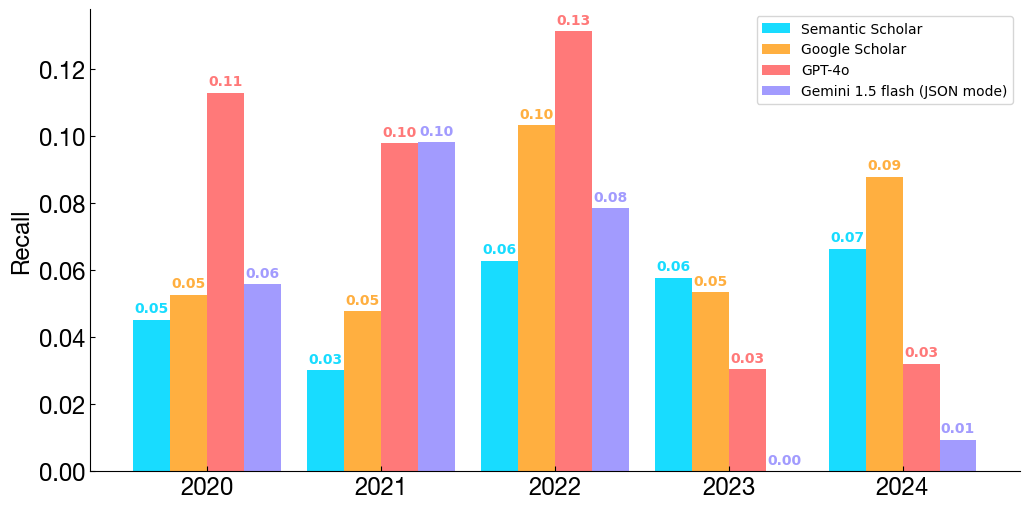

In [7]:
df = format_to_df(table_years, "recall", ["Semantic Scholar", "Google Scholar", "GPT-4o", "Gemini 1.5 flash (JSON mode)"])
display_histogram(df, ylabel="Recall")

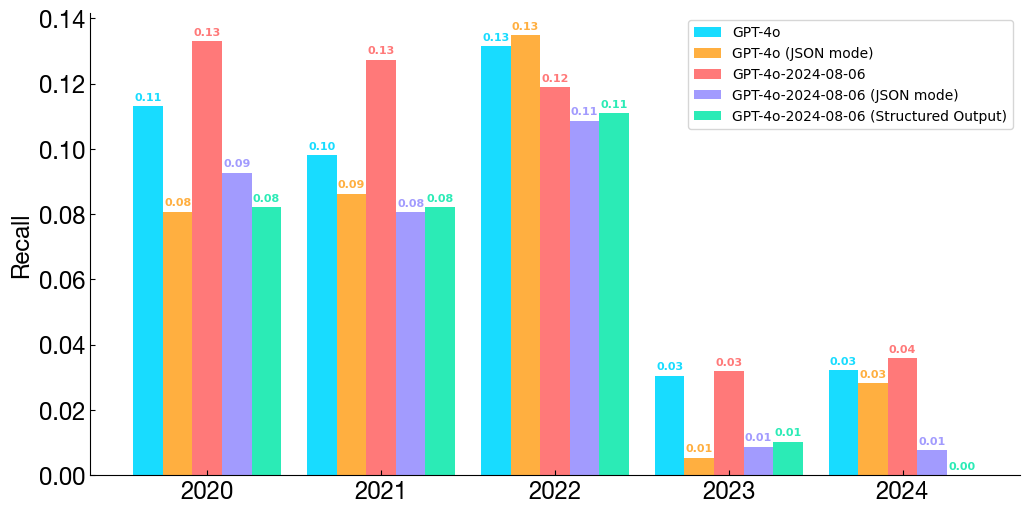

In [8]:
df = format_to_df(table_years, "recall", ["GPT-4o", "GPT-4o (JSON mode)", "GPT-4o-2024-08-06", "GPT-4o-2024-08-06 (JSON mode)", "GPT-4o-2024-08-06 (Structured Output)"])
display_histogram(df, ylabel="Recall")

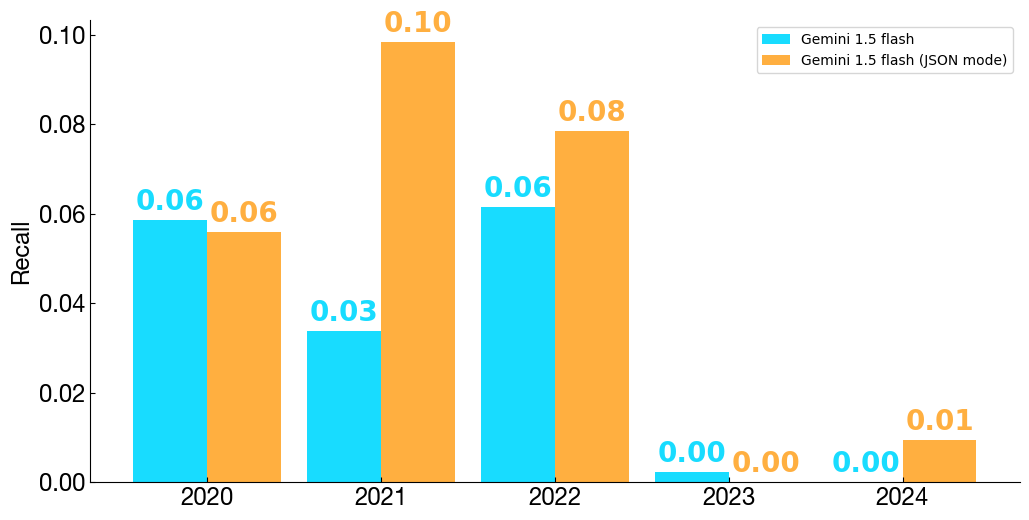

In [9]:
df = format_to_df(table_years, "recall", ["Gemini 1.5 flash", "Gemini 1.5 flash (JSON mode)"])
display_histogram(df, ylabel="Recall")